In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [2]:
# portfolio of sector ETFs and their names
ticker_sector_map = {
    "XLC": "Communication Services",
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Health Care",
    "XLI": "Industrials",
    "XLB": "Materials",
    "XLRE": "Real Estate",
    "XLK": "Technology",
    "XLU": "Utilities",
    "SPY": "S&P 500"
}

tickers = list(ticker_sector_map.keys())
sector_labels = {ticker: f"{ticker} - {name}" for ticker, name in ticker_sector_map.items()}

In [3]:
end_date = dt.datetime.now().strftime("%Y-%m-%d")
# end_date minus 10 years
start_date = (dt.datetime.now() - pd.DateOffset(years=10)).strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# # download data to csv, filename have tickers joined by underscore and end_date
# data.to_csv("_".join(tickers) + "_" + end_date + ".csv")

In [4]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("_".join(tickers) + "_" + end_date + ".csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# set index as datetime
df.index = pd.to_datetime(df.index)

# keep only level 1 'Close' prices
df = df.xs('Close', level=1, axis=1)

# use descriptive names in charts/legends
df = df.rename(columns=sector_labels)

# Show the result
df.head()

Ticker,XLE - Energy,XLC - Communication Services,SPY - S&P 500,XLU - Utilities,XLB - Materials,XLRE - Real Estate,XLI - Industrials,XLP - Consumer Staples,XLF - Financials,XLV - Health Care,XLY - Consumer Discretionary,XLK - Technology
Date,,,,,,,,,,,,
2016-02-12,18.413979,NaN,158.176102,16.562733,16.350248,19.491259,41.595615,38.336224,13.816688,54.497967,31.334372,17.543669
2016-02-16,18.597178,NaN,160.845840,16.668156,16.599960,19.491259,42.433052,38.642487,14.039207,55.522385,32.093151,17.856386
2016-02-17,19.206762,NaN,163.473206,16.635439,16.927452,20.101021,43.086269,39.040630,14.228022,56.225082,32.784584,18.222719
2016-02-18,18.966927,NaN,162.803680,16.908089,16.878328,20.349184,43.061138,38.864517,14.147105,55.877968,32.569069,18.151237
2016-02-19,18.923618,NaN,162.727386,16.795389,16.681824,20.320820,42.977386,38.925785,14.147105,55.818707,32.658878,18.164640


In [5]:
# fill missing values with backward fill method on column XLC - Communication Services
df['XLC - Communication Services'] = df['XLC - Communication Services'].fillna(method='bfill')

In [11]:
# df.info()

In [7]:
df.columns

Index(['XLE - Energy', 'XLC - Communication Services', 'SPY - S&P 500',
       'XLU - Utilities', 'XLB - Materials', 'XLRE - Real Estate',
       'XLI - Industrials', 'XLP - Consumer Staples', 'XLF - Financials',
       'XLV - Health Care', 'XLY - Consumer Discretionary',
       'XLK - Technology'],
      dtype='object', name='Ticker')

In [8]:
# Sectors ratios list
ratios_list = ['XLE - Energy/SPY - S&P 500',
               'XLC - Communication Services/SPY - S&P 500',
               'XLU - Utilities/SPY - S&P 500',
               'XLB - Materials/SPY - S&P 500',
               'XLRE - Real Estate/SPY - S&P 500',
               'XLI - Industrials/SPY - S&P 500',
               'XLP - Consumer Staples/SPY - S&P 500',
               'XLF - Financials/SPY - S&P 500',
               'XLV - Health Care/SPY - S&P 500',
               'XLY - Consumer Discretionary/SPY - S&P 500',
               'XLK - Technology/SPY - S&P 500'               
               ]

In [9]:
# create ratios DataFrame
ratios_df = pd.DataFrame(index=df.index)

# Calculate the price ratios for each pair in the ratios list
for pair in ratios_list:
    base, quote = pair.split('/')
    ratios_df[pair] = df[base] / df[quote]

# fill any NaN values with 0 (zero)
"""
Although this is not the proper solution, it is a quick fix to avoid issues with NaN values, 
especially for SOL, that is more recent than the other cryptos.
"""
ratios_df = ratios_df.fillna(0)

# Show the result
ratios_df.tail()

,XLE - Energy/SPY - S&P 500,XLC - Communication Services/SPY - S&P 500,XLU - Utilities/SPY - S&P 500,XLB - Materials/SPY - S&P 500,XLRE - Real Estate/SPY - S&P 500,XLI - Industrials/SPY - S&P 500,XLP - Consumer Staples/SPY - S&P 500,XLF - Financials/SPY - S&P 500,XLV - Health Care/SPY - S&P 500,XLY - Consumer Discretionary/SPY - S&P 500,XLK - Technology/SPY - S&P 500
Date,,,,,,,,,,,
2026-02-05,0.077049,0.171497,0.063605,0.074526,0.060845,0.248473,0.128272,0.078643,0.228506,0.173416,0.200156
2026-02-06,0.077105,0.167618,0.062770,0.074585,0.060800,0.250760,0.127335,0.078567,0.228360,0.170846,0.204353
2026-02-09,0.077297,0.168427,0.062656,0.075193,0.060883,0.250306,0.125989,0.077729,0.225261,0.169393,0.206571
2026-02-10,0.077414,0.169884,0.063862,0.076446,0.061897,0.251271,0.125917,0.077371,0.224426,0.170967,0.205961
2026-02-11,0.079455,0.168709,0.064440,0.077490,0.061853,0.252674,0.127753,0.076218,0.225808,0.170183,0.206616


In [11]:
# plot ratios for each pair in the ratios list using subplots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculate number of rows and columns for subplots
n_ratios = len(ratios_list)
n_cols = 3  # 3 columns
n_rows = (n_ratios + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig = make_subplots(
    rows=n_rows, 
    cols=n_cols,
    subplot_titles=[f'{ratio}' for ratio in ratios_list],
    vertical_spacing=0.08,
    horizontal_spacing=0.05
)

# Add each ratio as a separate subplot
for i, ratio in enumerate(ratios_list):
    row = (i // n_cols) + 1
    col = (i % n_cols) + 1
    
    fig.add_trace(
        go.Scatter(
            x=ratios_df.index,
            y=ratios_df[ratio],
            mode='lines',
            name=ratio,
            line=dict(width=2),
            showlegend=False
        ),
        row=row, col=col
    )
    
    # Update y-axis title for each subplot
    fig.update_yaxes(title_text="Ratio", row=row, col=col)
    fig.update_xaxes(title_text="Date", row=row, col=col)

# Update layout
fig.update_layout(
    title_text="S&P 500 Sectors Ratios - Individual Analysis",
    title_x=0.5,
    height=300 * n_rows,  # Adjust height based on number of rows
    showlegend=False
)

fig.show()

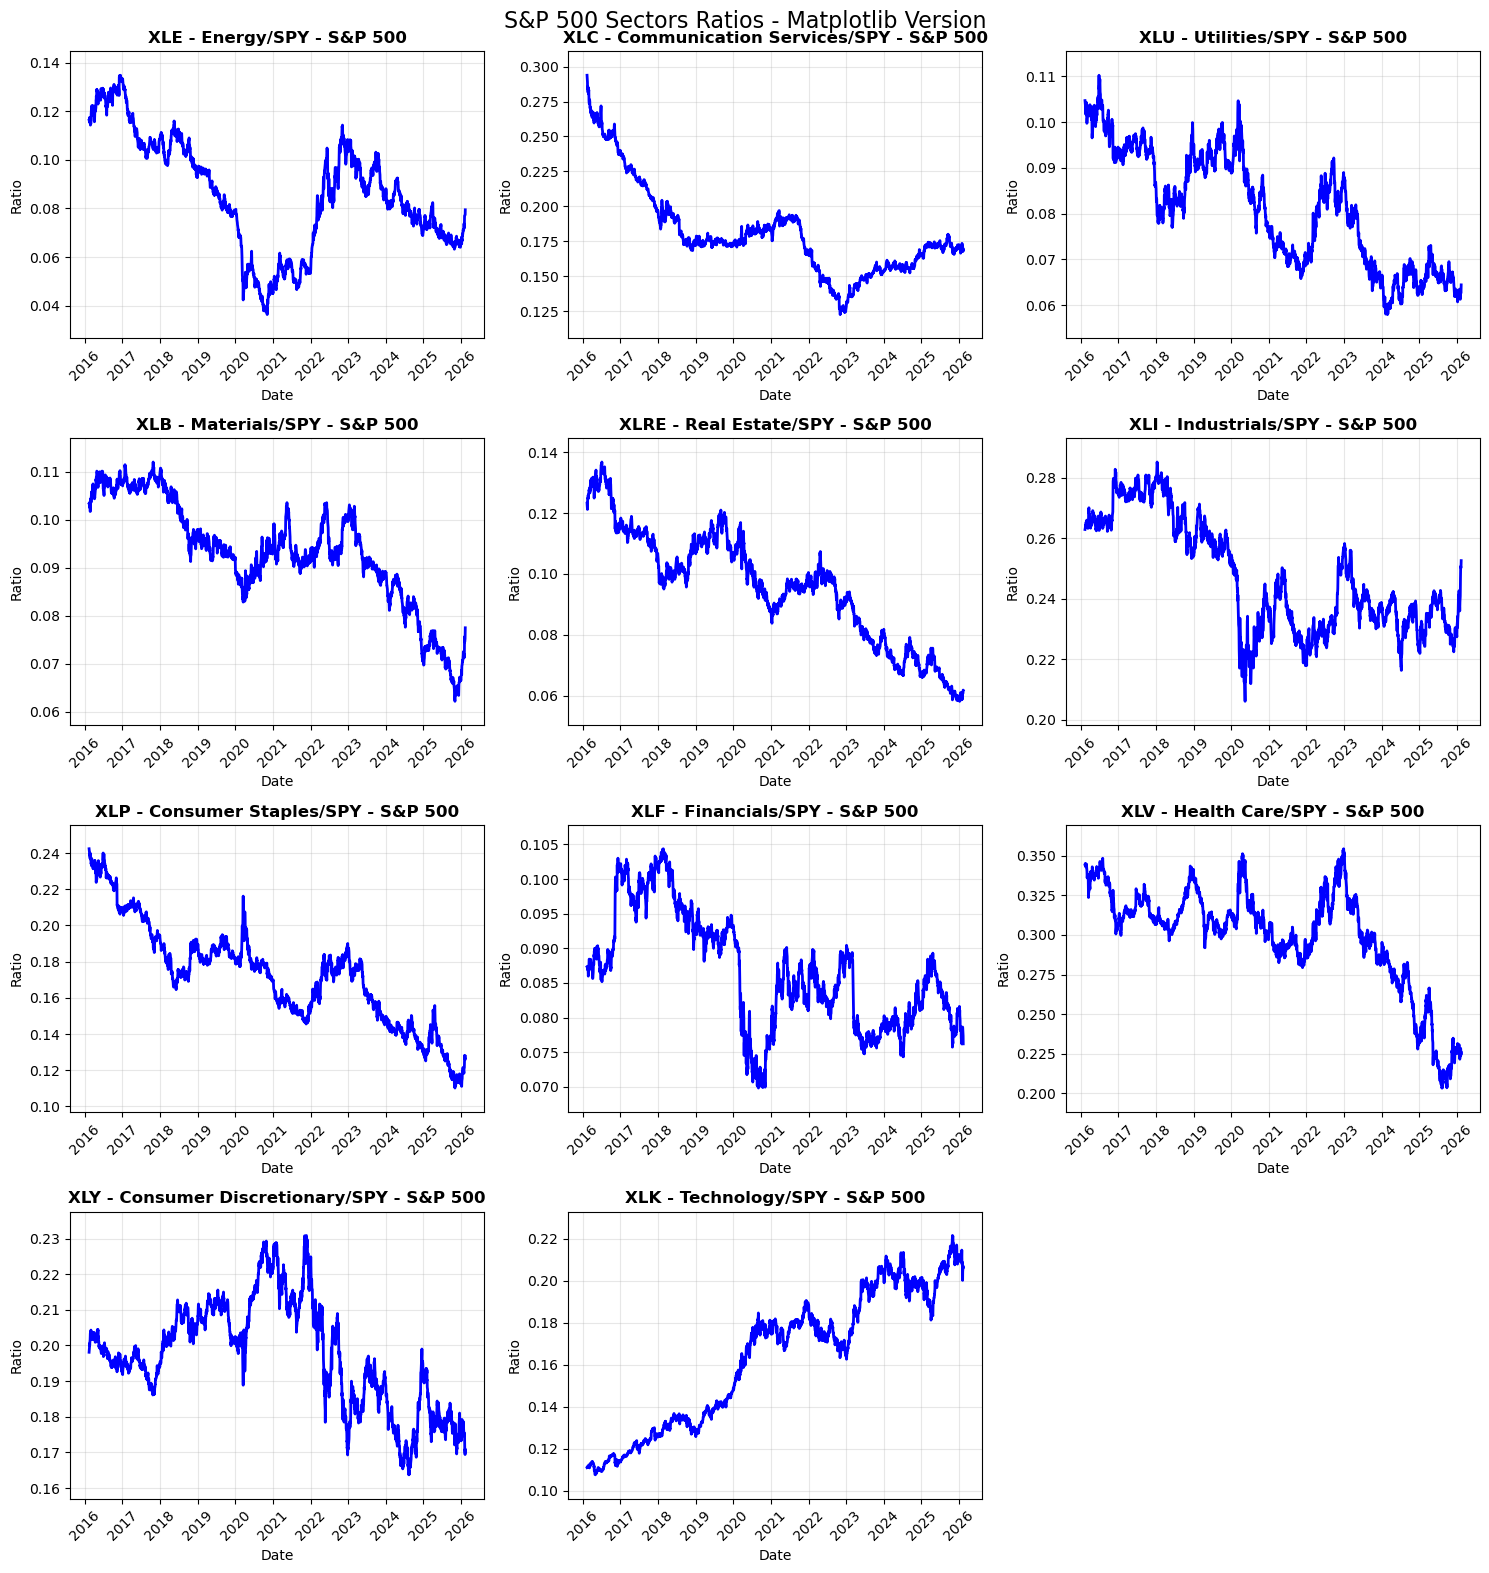


S&P 500 Sectors Ratios Summary Statistics:
XLE - Energy/SPY - S&P 500: Mean=0.0862, Std=0.0235, Min=0.0363, Max=0.1349
XLC - Communication Services/SPY - S&P 500: Mean=0.1813, Std=0.0322, Min=0.1226, Max=0.2938
XLU - Utilities/SPY - S&P 500: Mean=0.0810, Std=0.0125, Min=0.0580, Max=0.1102
XLB - Materials/SPY - S&P 500: Mean=0.0932, Std=0.0113, Min=0.0622, Max=0.1121
XLRE - Real Estate/SPY - S&P 500: Mean=0.0956, Std=0.0186, Min=0.0582, Max=0.1367
XLI - Industrials/SPY - S&P 500: Mean=0.2472, Std=0.0185, Min=0.2062, Max=0.2853
XLP - Consumer Staples/SPY - S&P 500: Mean=0.1726, Std=0.0285, Min=0.1102, Max=0.2424
XLF - Financials/SPY - S&P 500: Mean=0.0866, Std=0.0083, Min=0.0698, Max=0.1044
XLV - Health Care/SPY - S&P 500: Mean=0.2994, Std=0.0328, Min=0.2034, Max=0.3544
XLY - Consumer Discretionary/SPY - S&P 500: Mean=0.1974, Std=0.0151, Min=0.1637, Max=0.2309
XLK - Technology/SPY - S&P 500: Mean=0.1632, Std=0.0324, Min=0.1075, Max=0.2215


In [12]:
# Alternative matplotlib visualization of S&P 500 sectors ratios

# Create subplots using matplotlib
n_ratios = len(ratios_list)
n_cols = 3
n_rows = (n_ratios + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('S&P 500 Sectors Ratios - Matplotlib Version', fontsize=16, y=0.98)

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = [axes] if n_cols == 1 else axes
else:
    axes = axes.flatten()

# Plot each ratio
for i, ratio in enumerate(ratios_list):
    if i < len(axes):
        axes[i].plot(ratios_df.index, ratios_df[ratio], linewidth=2, color='blue')
        axes[i].set_title(f'{ratio}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Ratio')
        axes[i].grid(True, alpha=0.3)
        axes[i].tick_params(axis='x', rotation=45)
        
        # Remove zero values from y-axis display for better scaling
        non_zero_data = ratios_df[ratio][ratios_df[ratio] > 0]
        if not non_zero_data.empty:
            y_min, y_max = non_zero_data.min(), non_zero_data.max()
            margin = (y_max - y_min) * 0.1
            axes[i].set_ylim(max(0, y_min - margin), y_max + margin)

# Hide any unused subplots
for i in range(len(ratios_list), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics
print("\nS&P 500 Sectors Ratios Summary Statistics:")
print("=" * 50)
for ratio in ratios_list:
    non_zero_data = ratios_df[ratio][ratios_df[ratio] > 0]
    if not non_zero_data.empty:
        print(f"{ratio:>10}: Mean={non_zero_data.mean():.4f}, "
              f"Std={non_zero_data.std():.4f}, "
              f"Min={non_zero_data.min():.4f}, "
              f"Max={non_zero_data.max():.4f}")
    else:
        print(f"{ratio:>10}: No valid data available")